# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as ow

from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [45]:
weather_data = []
counter = 0
places = ["London", "Paris", "Madrid","Boston","Raleigh","Mumbai", "Tokyo", "Rome", "Lincoln"]
settings = {"units": "imperial", "appid": api_key}

#timed while loop to get around the 60per minute call back issue.

for x in places:
    weather_data.append(ow.get_current(x, **settings)) 
#To get around the 60 calls per minute limitation, I just wait 1 second between calls.   
    counter += 1
    time.sleep(1)

summary = ['sys.country',"main.temp", "main.temp_min", 'main.temp_max', 'main.humidity', 'clouds.all','wind.speed', 'coord.lon', 'coord.lat','dt'] 
data = [response(*summary) for response in weather_data]
column_names = ["Country",'Temperature', "Min Temp","Max Temp", "Humidity","Cloudiness", "Wind Speed", "Longitude", "Latitude", "Date"]
#convert timestamp to date

weather_data = pd.DataFrame(data, index=places, columns=column_names)
print(weather_data)


        Country  Temperature  Min Temp  Max Temp  Humidity  Cloudiness  \
London       GB        46.63     42.80     51.80        66           0   
Paris        FR        49.01     44.60     53.60        57           0   
Madrid       ES        66.15     59.00     71.60        35           0   
Boston       US        64.98     61.00     69.80        88          90   
Raleigh      US        93.76     91.00     97.00        41          75   
Mumbai       IN        82.40     82.40     82.40        83          20   
Tokyo        JP        69.94     62.60     77.00        93          40   
Rome         IT        63.61     57.00     70.00        82          40   
Lincoln      US        54.28     53.01     55.99       100          90   

         Wind Speed  Longitude  Latitude        Date  
London         4.70      -0.13     51.51  1570043405  
Paris          8.05       2.35     48.86  1570043860  
Madrid         2.24      -3.70     40.42  1570043982  
Boston        10.29     -71.06     42.3

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
weather_data

,Country,Temperature,Min Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Longitude,Latitude
London,GB,52.95,50.00,55.99,50,20,8.05,-0.13,51.51
Paris,FR,55.22,52.00,59.00,47,0,12.75,2.35,48.86
Madrid,ES,71.56,63.00,75.20,28,0,2.24,-3.70,40.42
Boston,US,72.97,69.01,77.00,73,90,5.82,-71.06,42.36
Raleigh,US,91.11,87.80,93.99,52,75,5.82,-78.64,35.78
Mumbai,IN,84.20,84.20,84.20,79,20,6.11,72.85,19.01
Tokyo,JP,71.17,62.01,79.00,83,75,10.29,139.76,35.68
Rome,IT,65.97,57.00,73.40,73,75,5.82,12.48,41.89
Lincoln,GB,52.93,50.00,55.40,62,75,5.82,-0.54,53.23


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

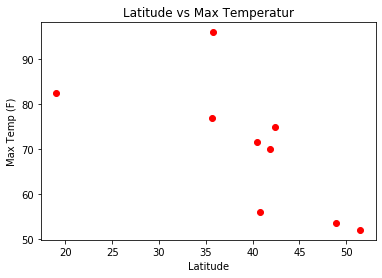

In [41]:
x_axis = weather_data["Latitude"]
y_axis = weather_data['Max Temp']

plt.title("Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.scatter(x_axis, y_axis, marker="o", color="red")
plt.show()

#### Latitude vs. Humidity Plot

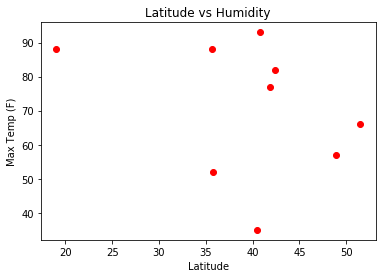

In [42]:
x_axis = weather_data["Latitude"]
y_axis = weather_data['Humidity']

plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.scatter(x_axis, y_axis, marker="o", color="red")
plt.show()

#### Latitude vs. Cloudiness Plot

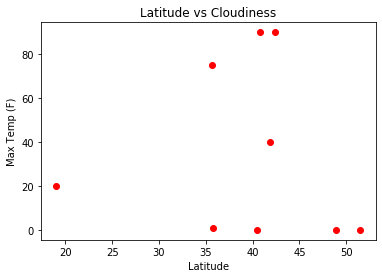

In [43]:
x_axis = weather_data["Latitude"]
y_axis = weather_data['Cloudiness']

plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.scatter(x_axis, y_axis, marker="o", color="red")
plt.show()

#### Latitude vs. Wind Speed Plot

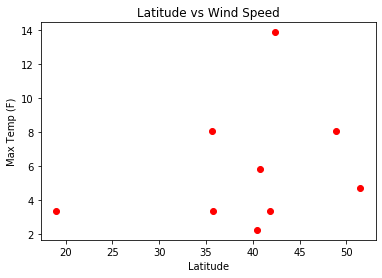

In [44]:
x_axis = weather_data["Latitude"]
y_axis = weather_data['Wind Speed']

plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.scatter(x_axis, y_axis, marker="o", color="red")
plt.show()